In [10]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('canada_per_capita_income.csv')
pd.set_option('display.max_rows', 5)
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
...,...,...
45,2015,35175.188980
46,2016,34229.193630


In [15]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.rename({'year': 'year', 'per_capita_income_(US$)': 'gdp'}, axis=1, inplace=True)
pd.set_option('display.max_rows', 5)
df

,year,gdp
0,1970,3399.299037
1,1971,3768.297935
...,...,...
45,2015,35175.188980
46,2016,34229.193630


In [23]:
pd.reset_option('use_inf_as_na') # 'all' in place of 'use_inf_as_na' an see the notice
df.columns = [c.replace(' ', '_') for c in df.columns]
df.rename({'year': 'year', 'per_capita_income_(US$)': 'gdp'}, axis=1, inplace=True)
df

,year,gdp
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


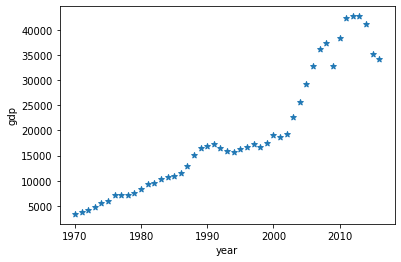

In [26]:
plt.xlabel('year')
plt.ylabel('gdp')
plt.scatter(df.year, df.gdp, marker = '*')
plt.show()

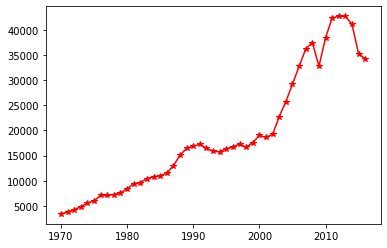

In [29]:
x =df.year
y = df.gdp
plt.plot(x,y, color = 'r', marker='*')
plt.show()

In [32]:
# gdp:per capita income (US$) is a target value; 

reg = linear_model.LinearRegression()

reg.fit(df[["year"]], df.gdp)

LinearRegression()

In [33]:
reg.coef_, reg.intercept_ # slope[m], interception/costant[c] => y = mx + c

(array([828.46507522]), -1632210.7578554575)

In [36]:
reg.predict([[2020]])

array([41288.69409442])

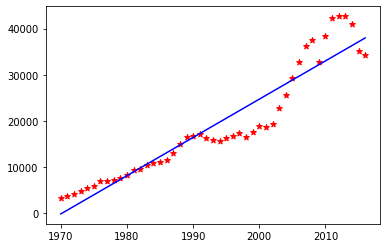

In [39]:
plt.scatter(df.year, df.gdp, color='red', marker='*')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [45]:
year_list = np.array([2000, 2001, 2005, 2010, 2011, 2015, 2020, 2021])
year_list = year_list.reshape(8,1)

In [46]:
year_list

array([[2000],
       [2001],
       [2005],
       [2010],
       [2011],
       [2015],
       [2020],
       [2021]])

In [47]:
reg.predict(year_list)

array([24719.39258996, 25547.85766519, 28861.71796608, 33004.04334219,
       33832.50841741, 37146.3687183 , 41288.69409442, 42117.15916964])

In [52]:
gdp_list = reg.predict(year_list)
gdp_list = gdp_list.reshape(8,1)

In [53]:
gdp_list

array([[24719.39258996],
       [25547.85766519],
       [28861.71796608],
       [33004.04334219],
       [33832.50841741],
       [37146.3687183 ],
       [41288.69409442],
       [42117.15916964]])

In [56]:
np.concatenate((year_list, gdp_list), axis=0)

array([[ 2000.        ],
       [ 2001.        ],
       [ 2005.        ],
       [ 2010.        ],
       [ 2011.        ],
       [ 2015.        ],
       [ 2020.        ],
       [ 2021.        ],
       [24719.39258996],
       [25547.85766519],
       [28861.71796608],
       [33004.04334219],
       [33832.50841741],
       [37146.3687183 ],
       [41288.69409442],
       [42117.15916964]])

In [59]:
df = np.concatenate((year_list, gdp_list), axis=1)
df

array([[ 2000.        , 24719.39258996],
       [ 2001.        , 25547.85766519],
       [ 2005.        , 28861.71796608],
       [ 2010.        , 33004.04334219],
       [ 2011.        , 33832.50841741],
       [ 2015.        , 37146.3687183 ],
       [ 2020.        , 41288.69409442],
       [ 2021.        , 42117.15916964]])

In [66]:
df.ndim, type(df), df.shape

(2, numpy.ndarray, (8, 2))

In [69]:
gdp_df  = pd.DataFrame(df)

In [70]:
gdp_df

,0,1
0,2000.0,24719.392590
1,2001.0,25547.857665
2,2005.0,28861.717966
3,2010.0,33004.043342
4,2011.0,33832.508417
5,2015.0,37146.368718
6,2020.0,41288.694094
7,2021.0,42117.159170


In [72]:
gdp_df.rename(columns={0: 'year', 1: 'income_per_capita_US$'}, inplace=True)
gdp_df

,year,income_per_capita_US$
0,2000.0,24719.392590
1,2001.0,25547.857665
2,2005.0,28861.717966
3,2010.0,33004.043342
4,2011.0,33832.508417
5,2015.0,37146.368718
6,2020.0,41288.694094
7,2021.0,42117.159170


In [75]:
gdp_df['year'] = gdp_df.year.astype(int)
gdp_df

,year,income_per_capita_US$
0,2000,24719.392590
1,2001,25547.857665
2,2005,28861.717966
3,2010,33004.043342
4,2011,33832.508417
5,2015,37146.368718
6,2020,41288.694094
7,2021,42117.159170


In [78]:
c_gdp = gdp_df['income_per_capita_US$']
round(c_gdp, 2)
#     round(14.22222223, 2)

0    24719.39
1    25547.86
2    28861.72
3    33004.04
4    33832.51
5    37146.37
6    41288.69
7    42117.16
Name: income_per_capita_US$, dtype: float64

In [73]:
gdp_df.to_csv("gdp_per_year")